# Домашнее задание по теме "Работа с переменными"

In [53]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

Загружаем наши данные.

In [109]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Проведём наш эксплоративный анализ данных. Начнём с вывода общей информации о датасете.

In [27]:
data.shape

(506, 14)

Мы видим, что датасет состоит из 506 записей и 14 атрибутов.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Наблюдаем, что пропущенных значений в данных нет. Значения в датасете имеют тип данных int (столбцы CHAS, RAD, TAX) или float (все остальные). Переменная CHAS является категориальной (принимает значения 0 или 1), все остальные - численными.

Выведем статистическую информацию о датасете.

In [29]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Сразу замечаем следующие факты:
- для столбца CRIM максимальное значение резко превосходит среднее и медианное значение. Это наводит на мысль о присутствии выбросов;
- в столбце ZN медиана равна нулю, минимальное значение - нулю, а максимальное - 100;
- в столбце B минимальное значение сильно ниже 25-ого перцентиля. Скорее всего, это тоже выброс.

Исследуем "не понравившиеся" нам столбцы подробнее. Построим для них боксплот.

<AxesSubplot:xlabel='CRIM'>

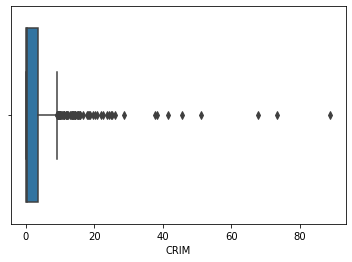

In [31]:
sns.boxplot(x=data['CRIM'])

<AxesSubplot:xlabel='ZN'>

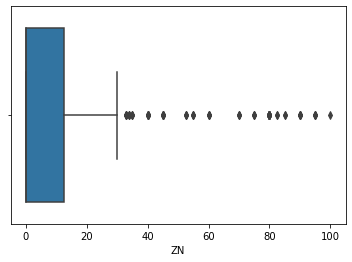

In [32]:
sns.boxplot(x=data['ZN'])

<AxesSubplot:xlabel='B'>

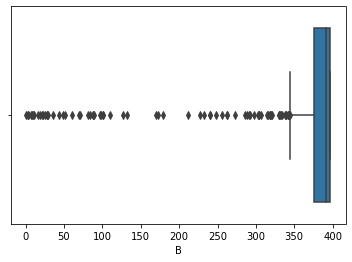

In [44]:
sns.boxplot(x=data['B'])

Действительно, наблюдаем значения, которые, есть судить чисто по критерию 3IQR, можно отнести к выбросам, однако нет значений, которые явно выбиваются из общей картины. Судя по всему, это просто очень сильно искажённое (смещённое) распределение. Сложно отнести какие-то значения к выбросам.

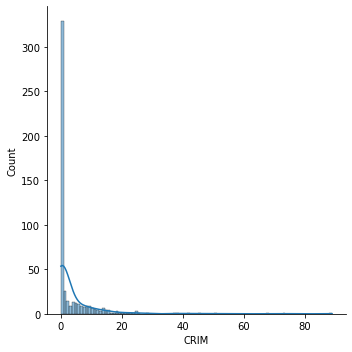

In [39]:
sns.displot(data['CRIM'],kde=True) 

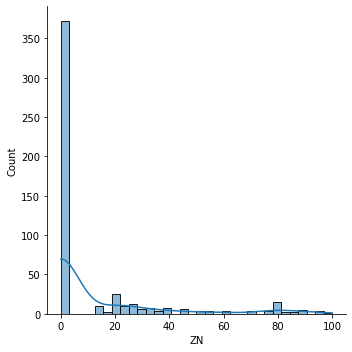

In [37]:
sns.displot(data['ZN'],kde=True) 

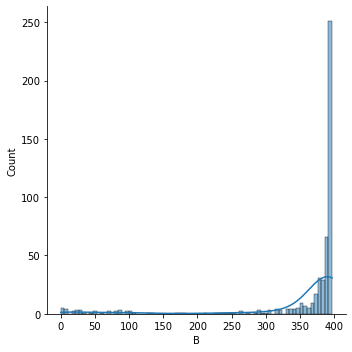

In [45]:
sns.displot(data['B'],kde=True) 

Действительно, распределения значений этих атрибутов имеют сильное смещение в левую или правую сторону. Так что можем сделать вывод, что выбросов в датасете нет.

Изучим корреляцию между признаками. Построим матрицу корреляции для нашего датасета.

<AxesSubplot:>

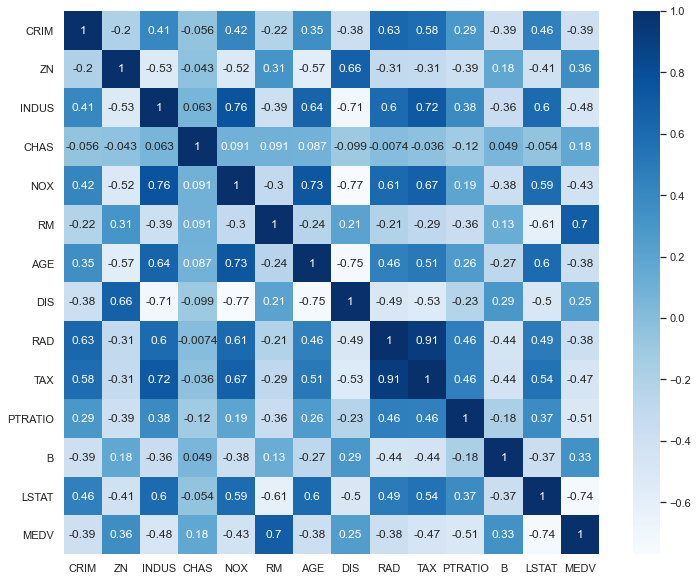

In [52]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data.corr(),cmap='Blues',annot=True) 

Сразу бросается в глаза сильная положительная корреляция атрибутов RAD и TAX, а также довольно сильная отрицательная корреляцию атрибутов AGE и DIS, LSTAT и MEDV, NOX и DIS, INDUS и DIS.

Теперь, когда мы провели анализ данных на пропущенные значения и выбросы, можно обучать нашу линейную модель.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [110]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
model = LinearRegression()
model.fit(X_train, y_train) 
# выведем скор модели для обучающей и тестовой выборки
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7434997532004697 0.7112260057484903


Результат, конечно, не из лучших. Но что будет, если мы всё-таки посчитаем некоторые выделяющиеся значения признаков выбросами и попробуем их отсечь, например, для столбца CRIM:

In [112]:
reduced = data[data['CRIM'] < 20]
X = reduced.drop('MEDV', axis=1)
y = reduced['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 
# выведем скор модели для обучающей и тестовой выборки
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7176992747929103 0.7432846804090784


Наблюдаем интересный эффект: точность распознавания на обучающих данных уменьшилась, а на тестовых, наоборот, выросла. Скорее всего, это эффект случайный, и отброшенные значения не являются всё-таки выбросами, т. к. если отбросить больше или меньше значений, то точность распознавания не растёт относительного первого случая (до удаления строк), или даже наоборот, падает:

In [113]:
reduced = data[data['CRIM'] < 30]
X = reduced.drop('MEDV', axis=1)
y = reduced['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 
# выведем скор модели для обучающей и тестовой выборки
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7360420402220168 0.715904949040572


In [114]:
reduced = data[data['CRIM'] < 10]
X = reduced.drop('MEDV', axis=1)
y = reduced['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 
# выведем скор модели для обучающей и тестовой выборки
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7542380324936798 0.6791184884474359


Всё-таки можно сделать вывод, что выделяющиеся на боксплоте значения выбросами не являются. Просто распределения данных имеют сильное искажение.